In [1]:
import numpy as np
import numpy.matlib

import matplotlib.pyplot as plt
import matplotlib.pylab as plt
from matplotlib.pyplot import figure

import scipy.integrate
from scipy.integrate import solve_ivp
from scipy.sparse import csr_matrix, triu, spdiags
from scipy.sparse.linalg import spsolve, splu
import scipy.sparse
import time

### Problem 1

### A1

In [2]:
L = 10
x = np.arange(-L, L, 0.1)
deltax = x[-1] - x[-2]

In [3]:
m = 200
zero = np.zeros((m))
one = np.ones((m))
Bin = np.array([-one, zero, one])
d = np.array([-1,0,1])
A = spdiags(Bin, d, m, m, format = 'csc')

In [4]:
A[0,-1] = -1
A[-1,0] = 1

/Users/annahuang/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/_index.py:82: SparseEfficiencyWarning: Changing the sparsity structure of a csc_matrix is expensive. lil_matrix is more efficient.
  self._set_intXint(row, col, x.flat[0])


In [5]:
A = A/(2*deltax)

In [6]:
A1 = A.todense().copy()

### A2

In [7]:
f = lambda x: np.exp(-(x-5)**2)
xp = [-L, L]

dt = 0.5
term = 10 # t = 10 
x = np.arange(-L,L,0.1)
N = len(x)

x_evals = np.arange(0,term+dt, dt)

y0 = f(x)

In [8]:
x_evals

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. ])

In [9]:
# U = 0.5 * A * U
A_2 = (0.5*A)

In [10]:
def PDE(t,x,A):
    u_t = A@x
    return u_t 

In [11]:
sol = solve_ivp(lambda t,x: PDE(t,x,A_2), [0,10], y0, t_eval = x_evals)

In [12]:
A2 = sol.y

### A3

In [13]:
f = lambda x: np.exp(-(x-5)**2)
L = 10 
xp = [-L, L]

dt = 0.5
term = 10 # t = 10 

x_evals = np.arange(0,term+dt, dt)

y0 = f(x)

x_range = np.arange(-L,L,0.1)

In [14]:
def funcPDE(t,u,x,A):
    
    z = x-4
    c = 1+2*np.sin(5*t)- np.heaviside(z,0)
    c_reshape = c.reshape(-1,1)
    
    A = A.multiply(c_reshape)
    u_t = A@u
    
    return u_t

In [15]:
sol1 = scipy.integrate.solve_ivp(lambda t,u: funcPDE(t,u,x,A),[0, 10],y0, t_eval = x_evals)

In [16]:
A3 = sol1.y

### Problem 2

### A4

In [17]:
# delta x or delta y 
n = 64
L = 10
l = np.linspace(-L, L, n+1)
dl = l[1]-l[0]

In [18]:
def A(m):

    # m = 64 # N value in x and y directions
    n = m*m # total size of matrix

    e1 = np.ones(n) # vector of ones
    Low1 = np.tile(np.concatenate((np.ones(m-1), [0])), (m,)) # Lower diagonal 1
    Low2 = np.tile(np.concatenate(([1], np.zeros(m-1))), (m,)) #Lower diagonal 2
                                        # Low2 is NOT on the second lower diagonal,
                                        # it is just the next lower diagonal we see
                                        # in the matrix.

    Up1 = np.roll(Low1, 1) # Shift the array for spdiags
    Up2 = np.roll(Low2, m-1) # Shift the other array

    A = scipy.sparse.spdiags([e1, e1, Low2, Low1, -4*e1, Up1, Up2, e1, e1],
                             [-(n-m), -m, -m+1, -1, 0, 1, m-1, m, (n-m)], n, n,format = 'csr')
    
    return A

In [19]:
# plt.spy(A(4)) # view the matrix structure
# plt.show()

In [20]:
# A(64)[0,0] = 2
A = A(64)
A[0,0] = 2
A = A/(dl**2)

In [21]:
A4 = np.copy(A.toarray())

### A5

In [22]:
def B(m):
    # m = 5
    n = m*m
    e1_B = np.ones((n)).T # vector of ones

    d_B = np.array([-((m**2)-m), - m, m, (m**2)-m])
    Bin_B = np.array([e1_B, -e1_B, e1_B, -e1_B])


    B = spdiags(Bin_B,d_B, n, n, format = 'csc')
    B = B/(2 * dl)
    return B

In [23]:
B = B(64)

In [24]:
A5 = np.copy(B.toarray())

In [25]:
# plt.spy(B(4))
# plt.show()

### A6

In [26]:
def C(m):
    # m = 5 
    n = m*m

    e1_C = np.ones(n) # vector of ones
    Low1_C = np.tile(np.concatenate((np.ones(m-1), [0])), (m,)) # Lower diagonal 1
    Low2_C = np.tile(np.concatenate(([1], np.zeros(m-1))), (m,)) #Lower diagonal 2

    Up1_C = np.roll(Low1_C, 1) 
    Up2_C = np.roll(Low2_C, m-1)

    C = scipy.sparse.spdiags([Low2_C, -Low1_C, Up1_C, -Up2_C],
                            [-m+1, -1, 1, m-1], n, n,format = 'csc')
    C = C/(2 * dl)
    return C
# plt.spy(C(5))
# plt.show()

In [27]:
C = C(64)

In [28]:
A6 = np.copy(C.toarray())

### A7

In [29]:
L = 10
xp = [0, 4]

# time
t_evals = np.linspace(0,4,500)
dt = 0.5

In [30]:
x = np.linspace(-10, 10, 64, endpoint=False)
y = np.linspace(-10, 10, 64, endpoint=False)
# k = np.exp(-2*(x**2) - ((y**2)/20))

In [31]:
w0_func = lambda x,y: np.exp((-2*(x**2))-((y**2)/20))
w0=np.zeros(len(x)**2)
k=0
for i in x:
    for j in y:
        w0[k]= w0_func(i,j)
        k=k+1

In [32]:
def func_ivp(t, w):
    
    v = 0.001
    
    # update psi 
    psi = scipy.sparse.linalg.spsolve(A, w)
    
    dw = (v*A@w) - ((B@psi)*(C@w)) + ((C@psi)*(B@w))
    
    return dw 

In [33]:
tic_gaus = time.time()
sol = scipy.integrate.solve_ivp(lambda t, w: func_ivp(t, w), xp, w0, t_eval = t_evals)
toc_gaus = time.time()
print(toc_gaus-tic_gaus)

0.7322778701782227


In [34]:
A7 = sol.y.T

### A8

In [35]:
L = 10
xp = [0, 4]

# time
t_evals = np.linspace(0,4,500)
dt = 0.5

In [36]:
range(len(t_evals))

range(0, 500)

In [37]:
T = 2
t = np.arange(0, T+0.01,0.01)

In [38]:
range(len(t))

range(0, 201)

In [39]:
w0_func = lambda x,y: np.exp((-2*(x**2))-((y**2)/20))
w0=np.zeros(len(x)**2)
k=0
for i in x:
    for j in y:
        w0[k]= w0_func(i,j)
        k=k+1

In [40]:
PLU = scipy.sparse.linalg.splu(A)

def func_ivp_plu(t, w):
    
    v = 0.001
    
    # update psi 
    psi = PLU.solve(w)
    
    dw = (v*A@w) - ((B@psi)*(C@w)) + ((C@psi)*(B@w))
    
    return dw 

/Users/annahuang/opt/anaconda3/lib/python3.9/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:318: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)


In [41]:
tic_plu = time.time()
sol2 = scipy.integrate.solve_ivp(lambda t, w: func_ivp_plu(t, w), xp, w0, t_eval = t_evals)
toc_plu = time.time()
print(toc_plu-tic_plu)

0.0502467155456543


In [42]:
A8 = sol2.y.T

### A9

In [43]:
sol2.t

array([0.        , 0.00801603, 0.01603206, 0.0240481 , 0.03206413,
       0.04008016, 0.04809619, 0.05611222, 0.06412826, 0.07214429,
       0.08016032, 0.08817635, 0.09619238, 0.10420842, 0.11222445,
       0.12024048, 0.12825651, 0.13627255, 0.14428858, 0.15230461,
       0.16032064, 0.16833667, 0.17635271, 0.18436874, 0.19238477,
       0.2004008 , 0.20841683, 0.21643287, 0.2244489 , 0.23246493,
       0.24048096, 0.24849699, 0.25651303, 0.26452906, 0.27254509,
       0.28056112, 0.28857715, 0.29659319, 0.30460922, 0.31262525,
       0.32064128, 0.32865731, 0.33667335, 0.34468938, 0.35270541,
       0.36072144, 0.36873747, 0.37675351, 0.38476954, 0.39278557,
       0.4008016 , 0.40881764, 0.41683367, 0.4248497 , 0.43286573,
       0.44088176, 0.4488978 , 0.45691383, 0.46492986, 0.47294589,
       0.48096192, 0.48897796, 0.49699399, 0.50501002, 0.51302605,
       0.52104208, 0.52905812, 0.53707415, 0.54509018, 0.55310621,
       0.56112224, 0.56913828, 0.57715431, 0.58517034, 0.59318

In [44]:
a = sol2.y[:,0].reshape(64,64)

In [45]:
b = sol2.y[:,1].reshape(64, 64)

In [46]:
c = sol2.y[:,2].reshape(64, 64)

In [47]:
d = sol2.y[:,3].reshape(64, 64)

In [48]:
e = sol2.y[:,4].reshape(64, 64)

In [49]:
f = sol2.y[:,5].reshape(64, 64)

In [50]:
g = sol2.y[:,6].reshape(64, 64)

In [51]:
h = sol2.y[:,7].reshape(64, 64)

In [52]:
i = sol2.y[:,8].reshape(64, 64)

In [53]:
j = sol2.y[:,9].reshape(64, 64)

In [54]:
k = sol2.y[:,10].reshape(64, 64)

In [55]:
l = sol2.y[:,11].reshape(64, 64)

In [56]:
A9 = np.stack([a,b,c,d,e,f,g,h,i,j,k,l])

In [73]:
A9_new = np.array([])

for i in range(len(t_evals)):
    ep = sol2.y[:,i].reshape(64, 64)
    
    A9_new = np.append(A9_new, ep)

In [77]:
A9 = A9_new.reshape(len(t_evals),64,64)

In [79]:
L = 10
term = 4
x = np.arange(-L, L, 0.3125)
y = np.arange(-L, L, 0.3125)
N = len(x)

In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [81]:
A9.shape

(500, 64, 64)

In [82]:
sol2.y.shape

(4096, 500)

In [83]:
A10 = sol2.y.reshape(64,64,len(t_evals))

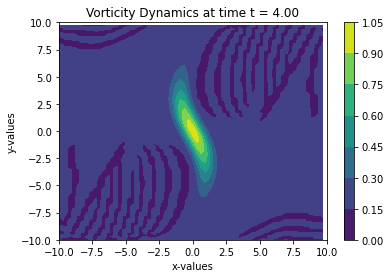

In [92]:
from numpy import array, zeros, linspace, meshgrid

# div = make_axes_locatable(ax)
# cax = div.append_axes('right', '5%', '5%')

# Generate grid for plotting
x = np.arange(-L, L, 0.3125)
y = np.arange(-L, L, 0.3125)
x,y = meshgrid(x,y)

fig = plt.figure()
ax = plt.axes(xlim=(-10, L), ylim=(-10, L))  
plt.xlabel(r'x-values')
plt.ylabel(r'y-values')

# animation function
def animate(i): 
    z = A9[i,:,:].T
    cont = plt.contourf(x, y, z)
    plt.title(r'Vorticity Dynamics at time t = %0.2f' % sol2.t[i])

    return cont 

z = A9[0,:,:].T
cont = plt.contourf(x, y, z)
fig.colorbar(cont)

# anim = animation.FuncAnimation(fig, animate, frames=12, interval=1000, save_count = 50)

# anim = animation.FuncAnimation(fig, animate, frames=60, interval=1000)

anim = animation.FuncAnimation(fig, animate, frames=len(t_evals), interval=13)

anim.save('animation.mp4')

In [69]:
# fig4, ax4 = plt.subplots()

# X, Y = np.meshgrid(x, y)
# surf = ax4.contourf(Y, X, A9)
# fig5.colorbar(surf)

# ax4.set_xlabel(r'$y-value$', fontsize=14)
# ax4.set_ylabel(r'$x-value$', fontsize=14)

In [70]:
# fig5, ax5 = plt.subplots()

# X, Y = np.meshgrid(x, y)
# surf = ax5.contourf(Y, X, o)
# fig5.colorbar(surf)

# # ax5.set_title('Contour plot of the time evolution of the second mode', fontsize = 16)
# ax5.set_xlabel(r'$y-value$', fontsize=14)
# ax5.set_ylabel(r'$x-value$', fontsize=14)